In [1]:
import netCDF4 as nc4
from netCDF4 import Dataset
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.basemap import Basemap

Libaries properly loaded. Ready to start


In [2]:
# Sentinel 5P file I want to process
#s5p_file = '/neodc/sentinel5p/data/L2_NO2/v1.3/2020/04/26/S5P_NRTI_L2__NO2____20200426T123448_20200426T123948_13139_01_010302_20200426T131747.nc'
s5p_file = '/neodc/sentinel5p/data/L2_NO2/v1.3/2020/01/01/S5P_OFFL_L2__NO2____20200101T110146_20200101T124316_11493_01_010302_20200103T041218.nc'

file = Dataset(s5p_file, mode='r')

In [3]:
print(file)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7
    institution: KNMI
    source: Sentinel 5 precursor, TROPOMI, space-borne remote sensing, L2
    summary: TROPOMI/S5P NO2 1-Orbit L2 Swath 7x3.5km
    tracking_id: 029dc346-4505-471e-a81a-1f1c7a2786b4
    id: S5P_OFFL_L2__NO2____20200101T110146_20200101T124316_11493_01_010302_20200103T041218
    time_reference: 2020-01-01T00:00:00Z
    time_reference_days_since_1950: 25567
    time_reference_julian_day: 2458849.5
    time_reference_seconds_since_1970: 1577836800
    time_coverage_start: 2020-01-01T11:23:20Z
    time_coverage_end: 2020-01-01T12:21:44Z
    time_coverage_duration: PT3504.402S
    time_coverage_resolution: PT0.840S
    orbit: 11493
    references: http://www.tropomi.eu/data-products/nitrogen-dioxide
    processor_version: 1.3.2
    keywords_vocabulary: AGU index terms, http://publications.agu.org/author-resource-center/index-terms/
    keywords: 0345 Pollution, 

In [4]:
lons = file.groups['PRODUCT'].variables['longitude'][:][0,:,:]
lats = file.groups['PRODUCT'].variables['latitude'][:][0,:,:]
no2 = file.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'][0,:,:]
print(lons.shape)
print (lats.shape)
print (no2.shape)


no2_units = file.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'].units

(4173, 450)
(4173, 450)
(4173, 450)


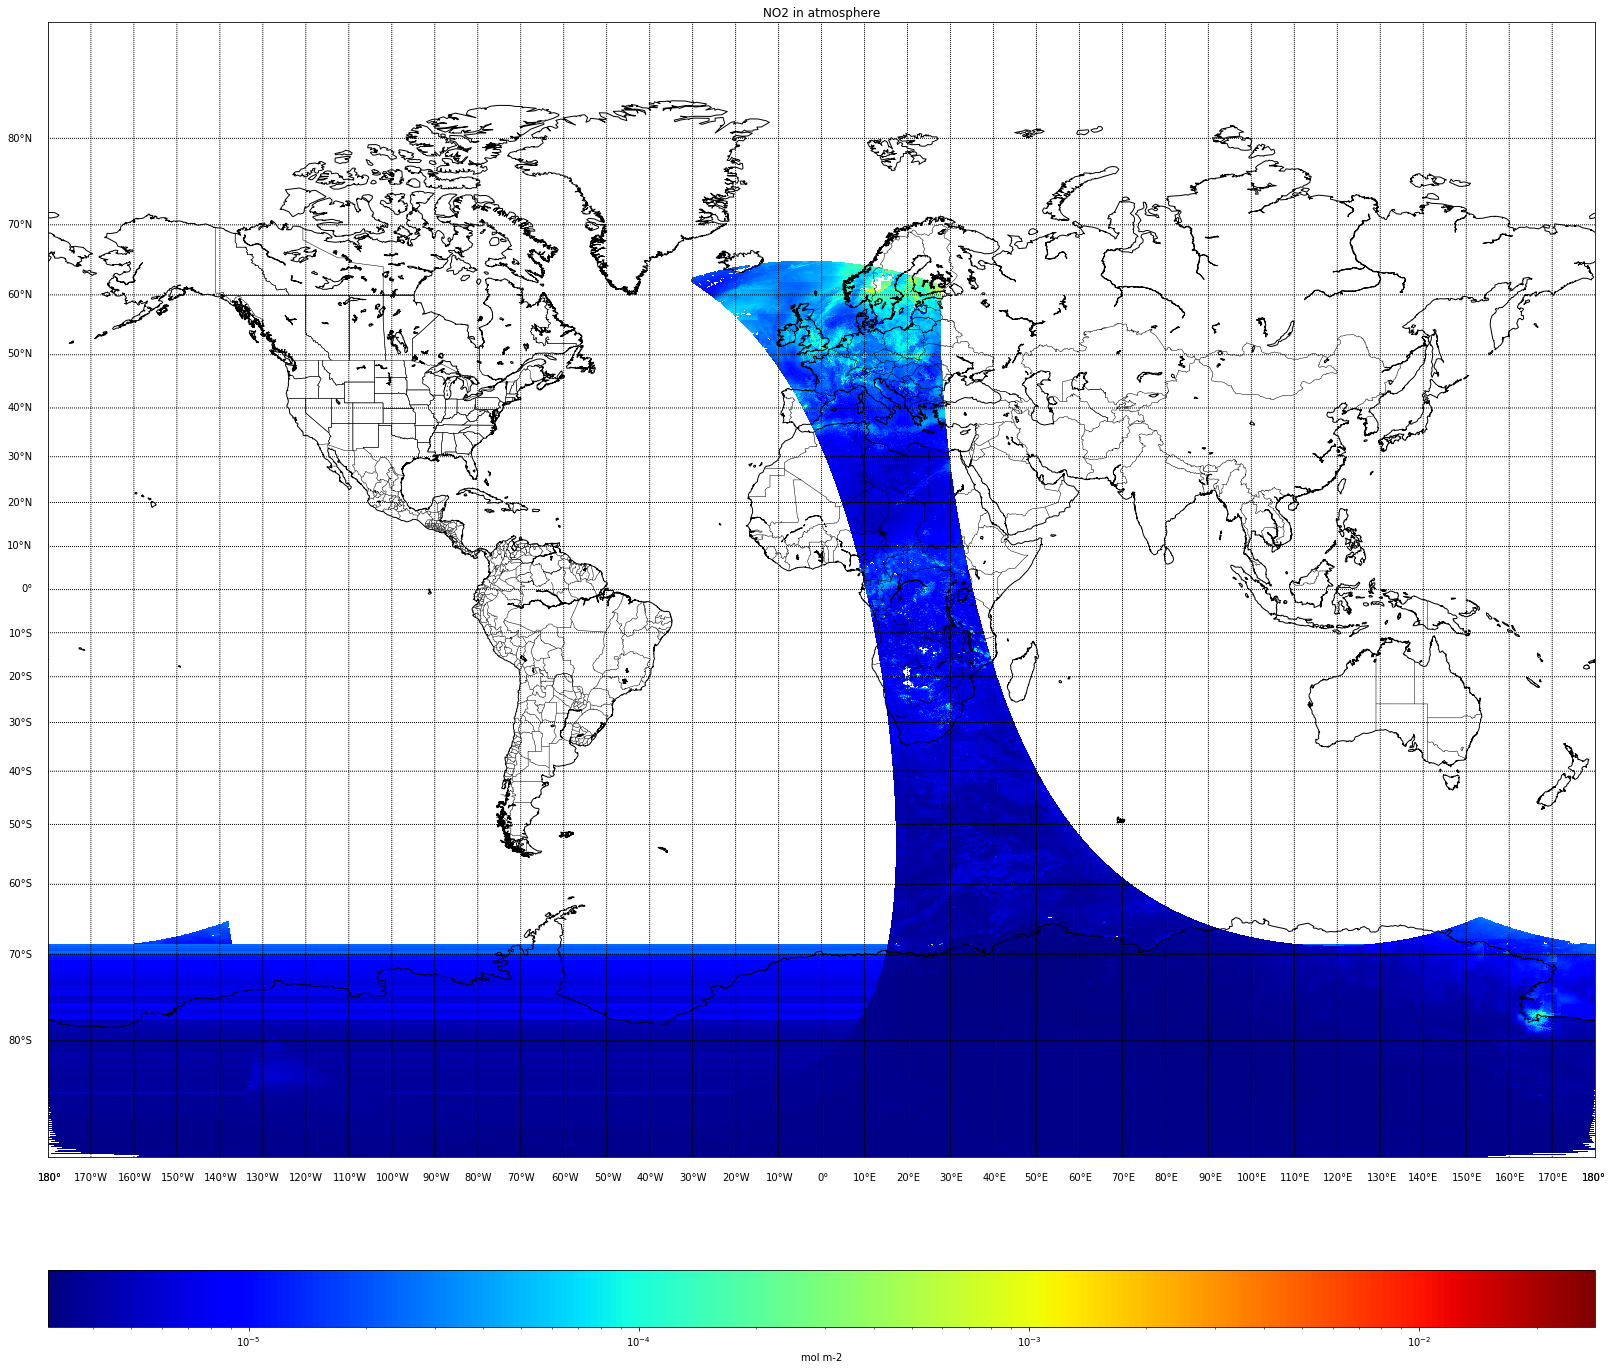

In [5]:
plt.figure(figsize=(48,24))

lon_0 = lons.mean()
lat_0 = lats.mean()

#m = Basemap(width=5000000,height=3500000,
#            resolution='l',projection='stere',\
#            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

m = Basemap(resolution='l',projection='mill',lon_0=0)

xi, yi = m(lons, lats)

# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(no2),norm=LogNorm(), cmap='jet')

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(no2_units)

# Add Title
plt.title('NO2 in atmosphere')

plt.show()